# Text Processing for Accelerator project

A simplified pipeline processing text with FastText.

* Load demo data - Film overviews/genres
* Basic text cleaning
* Vectorize (with FastText)
* Cluster (HDBSCAN)
* Evaluate
* Visualise

In [94]:
%load_ext autoreload
%autoreload 2

In [53]:
import functools
from pprint import pprint
from time import time
import logging
import pandas as pd
import numpy as np
import plotly.express

In [54]:
import text_processing_test1

#### Load in the CPA data

In [95]:
CPA = text_processing_test1.fetch_files()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2020-11-12 15:39:50,549 - text_processing_test1 - INFO - CPA File imported
2020-11-12 15:39:50,549 - text_processing_test1 - INFO - CPA File imported
2020-11-12 15:39:50,549 - text_processing_test1 - INFO - CPA File imported
INFO:text_processing_test1:CPA File imported


In [96]:
text_processing_test1.hello_you()

hello you!


In [56]:
df = text_processing_test1.clean_col(CPA_L6, "Descr")

2020-11-12 14:35:06,321 - text_processing_test1 - INFO - Cleaning column: Descr 
2020-11-12 14:35:06,321 - text_processing_test1 - INFO - Cleaning column: Descr 


In [57]:
df.sample(5)

,Order,Level,Code,Parent,Descr,tokens,Category_2,Category_1,Category_0,tokens_cleaned,Descr_cleaned,Descr_cleaned_vectorized,Descr_cleaned_vectorized_low_dimension,label
4493,1213285,6,63.11.20,63.11.2,Advertising space or time in Internet,Advertising space time Internet,63,J,5,advertising space time internet,advertising space time internet,"[-0.023318468, 0.02055695, 0.043932736, 0.0825...","[6.749771595001221, 2.4159014225006104, 3.9515...",110
2684,1211476,6,28.25.12,28.25.1,Air conditioning machines,Air conditioning machines,28,C,2,air conditioning machines,air conditioning machines,"[0.08912623, 0.069975615, -0.27450776, 0.19459...","[7.098773002624512, 5.524533271789551, 5.43230...",156
3546,1212338,6,42.99.29,42.99.2,Construction works for civil engineering const...,Construction works civil engineering construct...,42,F,3,construction works civil engineering construct...,construction works civil engineering construct...,"[-0.13493581, 0.0072494685, -0.12247011, 0.087...","[7.182941913604736, 5.059724807739258, 4.34942...",50
1623,1210415,6,22.11.15,22.11.1,"Inner tubes, solid or cushion tyres, interchan...",Inner tubes solid cushion tyres interchangeabl...,22,C,2,inner tubes solid cushion tyres interchangeabl...,inner tubes solid cushion tyres interchangeabl...,"[-0.1282077, -0.06980209, -0.13817544, 0.31912...","[7.313278675079346, 4.936184883117676, 5.89171...",61
40,1208832,6,01.11.94,01.11.9,Sesame seed,Sesame seed,01,A,1,sesame seed,sesame seed,"[-0.2674687, -0.14069293, -0.17655233, 0.41834...","[8.545059204101562, 9.94357967376709, 5.000530...",99


## Load FastText Pretrained

Note: This requires a fair bit of memory (peaks at about 17.5 GiB)

Recommend shutting down other kernels first, once this has loaded memory usage drops again.

This takes a few minutes to load in.

In [58]:
wv = text_processing_test.fetch_fasstext_pretrained(filepath="../../data/wiki.en.bin")

2020-11-12 14:35:07,569 - text_processing_test - INFO - Loading FastText pretrained from ../../data/wiki.en.bin


MemoryError: Unable to allocate 2.82 GiB for an array with shape (2519370, 300) and data type float32

### Vectorize Movie overviews

In [59]:
text_to_vec = functools.partial(text_processing_test1.vectorize_text, wv)

CPA_L6["Descr_cleaned_vectorized"] = CPA_L6.Descr_cleaned.apply(
    text_to_vec
)

### Dimensionality Reduction

In [60]:
CPA_L6["Descr_cleaned_vectorized_low_dimension"] = text_processing_test1.reduce_dimensionality(
    CPA_L6.Descr_cleaned_vectorized
)

2020-11-12 14:36:24,830 - text_processing_test1 - INFO - Applying umap to reduce dimension
2020-11-12 14:36:24,830 - text_processing_test1 - INFO - Applying umap to reduce dimension


UMAP(min_dist=0.0, n_components=10, n_neighbors=5, random_state=3052528580,
     verbose=10)
Construct fuzzy simplicial set
Thu Nov 12 14:36:31 2020 Finding Nearest Neighbors
Thu Nov 12 14:36:31 2020 Finished Nearest Neighbor Search
Thu Nov 12 14:36:31 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Nov 12 14:36:39 2020 Finished embedding


In [61]:
CPA_L6.sample(5)

,Order,Level,Code,Parent,Descr,tokens,Category_2,Category_1,Category_0,tokens_cleaned,Descr_cleaned,Descr_cleaned_vectorized,Descr_cleaned_vectorized_low_dimension,label
614,1209406,6,10.51.53,10.51.5,Casein,Casein,10,C,2,casein,casein,"[0.3255128, 0.21974388, -0.6182844, 0.16487388...","[8.652731895446777, 9.953420639038086, 4.47010...",-1
3474,1212266,6,41.00.24,41.00.2,Wholesale and retail trade buildings,Wholesale retail trade buildings,41,F,3,wholesale retail trade buildings,wholesale retail trade buildings,"[-0.1601731, -0.060569, -0.00014081597, 0.1193...","[7.635400772094727, 6.166362285614014, 3.57752...",145
5057,1213849,6,80.30.10,80.30.1,Investigation services,Investigation services,80,N,8,investigation services,investigation services,"[-0.060605623, -0.019477755, -0.40674716, 0.10...","[6.385741710662842, 1.7250117063522339, 2.7640...",103
4097,1212889,6,50.30.11,50.30.1,Inland passenger water transport services by f...,Inland passenger water transport services ferries,50,H,4,inland passenger water transport services ferries,inland passenger water transport services ferries,"[-0.22054042, 0.09069846, -0.17376618, 0.42953...","[6.673919677734375, 3.7545604705810547, 4.7979...",66
4416,1213208,6,61.10.11,61.10.1,Fixed telephony services - access and use,Fixed telephony services access use,61,J,5,fixed telephony services access use,fixed telephony services access use,"[-0.14708434, 0.18612762, -0.022439465, 0.1546...","[6.556840896606445, 2.260364532470703, 3.51638...",-1


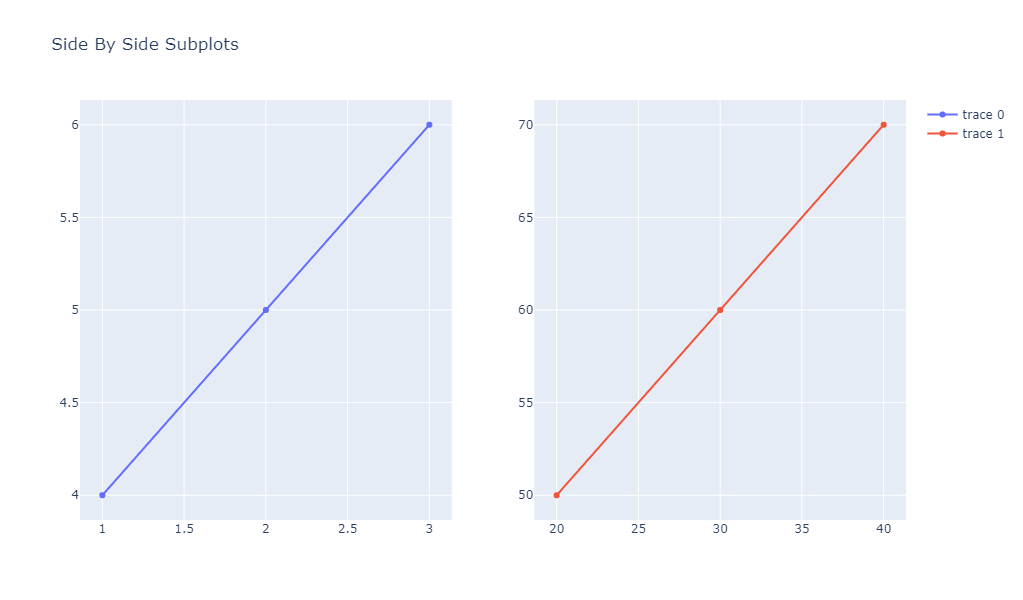

In [80]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[4, 5, 6]),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()

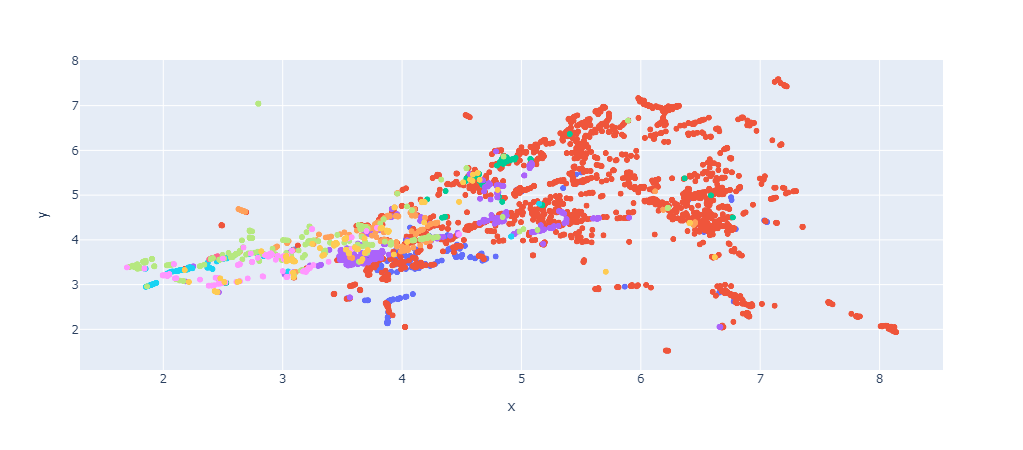

In [93]:
i=1
plot_df = CPA_L6[["Category_0","Descr_cleaned", "Code", "Descr_cleaned_vectorized_low_dimension"]].copy()
plot_df['Category'] = plot_df['Category_0'].astype(str)
plot_df["x"] = plot_df.Descr_cleaned_vectorized_low_dimension.apply(lambda x: x[2*i])
plot_df["y"] = plot_df.Descr_cleaned_vectorized_low_dimension.apply(lambda x: x[2*i+1])
fig = plotly.express.scatter(
    plot_df, 
    x="x", 
    y="y", 
    color="Category",
    hover_data={
        "Code": True,
        "Descr_cleaned": True,
        "Category":False,
        "x": False,
        "y": False
        })
fig.update_layout(showlegend=False)

In [83]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

plot_df = CPA_L6[["Category_0","Descr_cleaned", "Code", "Descr_cleaned_vectorized_low_dimension"]].copy()
plot_df['Category'] = plot_df['Category_0'].astype(str)

fig = make_subplots(rows=5, cols=1)
for i in range(0,5):
    plot_df["x"] = plot_df.Descr_cleaned_vectorized_low_dimension.apply(lambda x: x[2*i])
    plot_df["y"] = plot_df.Descr_cleaned_vectorized_low_dimension.apply(lambda x: x[2*i+1])

    fig.add_trace(
        
        
        fig = plotly.express.scatter(
    plot_df, 
    x="x", 
    y="y", 
    color="Category",
    hover_data={
        "Code": True,
        "Descr_cleaned": True,
        "Category":False,
        "x": False,
        "y": False
        })
        
        plotly.express.scatter(
        x="x", 
        y="y", 
        color="Category",
        hover_data={
            "Code": True,
            "Descr_cleaned" : True,
            "Category": False,
            "x": False,
            "y": False
            }),
        row=i, 
        col=1)
fig.update_layout(showlegend=True)
fig.show()

ValueError: String or int arguments are only possible when a DataFrame or an array is provided in the `data_frame` argument. No DataFrame was provided, but argument 'x' is of type str or int.

In [38]:
tmp = CPA_L6.copy()

In [39]:
tmp[tmp.Code=='39.00.14']

,Order,Level,Code,Parent,Descr,tokens,Category_2,Category_1,Category_0,tokens_cleaned,Descr_cleaned,Descr_cleaned_vectorized,Descr_cleaned_vectorized_low_dimension
3456,1212248,6,39.00.14,39.00.1,Building remediation services,Building remediation services,39,E,2,building remediation services,building remediation services,"[-0.24728699, -0.043922346, -0.22932397, 0.217...","[6.1735029220581055, 0.9141392111778259, 2.493..."


### Clustering

In [40]:
CPA_L6["label"] = text_processing_test1.cluster(CPA_L6.Descr_cleaned_vectorized_low_dimension)

In [41]:
import hdbscan

In [42]:
hdbscan.HDBSCAN

hdbscan.hdbscan_.HDBSCAN

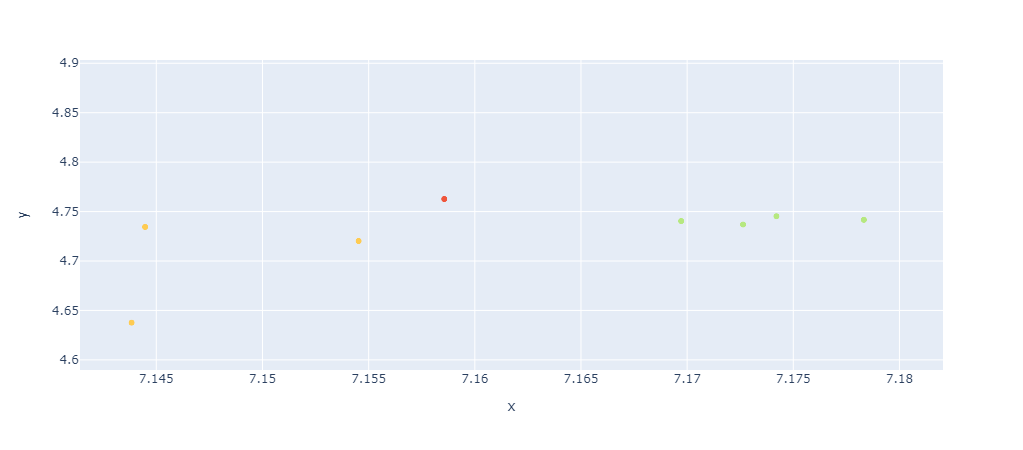

In [43]:
plot_df = CPA_L6[["Category_0","Descr_cleaned", "Code", "Descr_cleaned_vectorized_low_dimension","label"]].copy()

plot_df["x"] = plot_df.Descr_cleaned_vectorized_low_dimension.apply(lambda x: x[0])
plot_df["y"] = plot_df.Descr_cleaned_vectorized_low_dimension.apply(lambda x: x[1])

plot_df["label"] = plot_df.label.astype(str)

fig = plotly.express.scatter(
    plot_df, 
    x="x", 
    y="y", 
    color="label",
    hover_data={
        "Code": True,
        "Descr_cleaned": True,
        "label": True,
        "x": False,
        "y": False
        })
fig.update_layout(showlegend=False)

In [44]:
tmp = CPA_L6
tmp[tmp.label==5].sort_values('Category_2')

,Order,Level,Code,Parent,Descr,tokens,Category_2,Category_1,Category_0,tokens_cleaned,Descr_cleaned,Descr_cleaned_vectorized,Descr_cleaned_vectorized_low_dimension,label
1654,1210446,6,22.21.29,22.21.2,"Other tubes, pipes, hoses and fittings thereof...",Other tubes pipes hoses fittings thereof plastics,22,C,2,tubes pipes hoses fittings thereof plastics,tubes pipes hoses fittings thereof plastics,"[0.077122755, 0.05028489, -0.27833307, 0.34361...","[7.4124650955200195, 6.281780242919922, 7.1211...",5
1761,1210553,6,23.32.13,23.32.1,"Ceramic pipes, conduits, guttering and pipe fi...",Ceramic pipes conduits guttering pipe fittings,23,C,2,ceramic pipes conduits guttering pipe fittings,ceramic pipes conduits guttering pipe fittings,"[0.006994439, -0.0662736, -0.19467272, 0.48256...","[7.380402565002441, 6.245855331420898, 7.15109...",5
1934,1210726,6,24.20.40,24.20.4,"Tube or pipe fittings of steel,",Tube pipe fittings steel,24,C,2,tube pipe fittings steel,tube pipe fittings steel,"[-0.04931324, 0.12179676, -0.1318571, 0.417083...","[7.37842321395874, 6.247479438781738, 7.150657...",5
1995,1210787,6,24.42.26,24.42.2,"Aluminium tubes, pipes and tube or pipe fittings",Aluminium tubes pipes tube pipe fittings,24,C,2,aluminium tubes pipes tube pipe fittings,aluminium tubes pipes tube pipe fittings,"[0.008659512, 0.025202045, -0.10943237, 0.2880...","[7.38894510269165, 6.231879711151123, 7.150390...",5
2021,1210813,6,24.44.26,24.44.2,"Copper tubes, pipes and tube or pipe fittings",Copper tubes pipes tube pipe fittings,24,C,2,copper tubes pipes tube pipe fittings,copper tubes pipes tube pipe fittings,"[0.030719021, 0.099390805, -0.15333189, 0.2575...","[7.380051612854004, 6.2472028732299805, 7.1496...",5
2032,1210824,6,24.45.24,24.45.2,"Nickel tubes, pipes and tube or pipe fittings",Nickel tubes pipes tube pipe fittings,24,C,2,nickel tubes pipes tube pipe fittings,nickel tubes pipes tube pipe fittings,"[0.004770597, 0.0744408, -0.14998825, 0.229157...","[7.380275249481201, 6.248637676239014, 7.14773...",5
2051,1210843,6,24.51.30,24.51.3,"Tube or pipe fittings, of cast-iron",Tube pipe fittings cast-iron,24,C,2,tube pipe fittings castiron,tube pipe fittings castiron,"[-0.022030724, 0.10048878, -0.19378887, 0.2886...","[7.379155158996582, 6.244751930236816, 7.15232...",5
2060,1210852,6,24.52.30,24.52.3,"Tube or pipe fittings, of cast-steel",Tube pipe fittings cast-steel,24,C,2,tube pipe fittings caststeel,tube pipe fittings caststeel,"[-0.0058542653, 0.15754946, -0.17880425, 0.369...","[7.378618240356445, 6.244191646575928, 7.15211...",5


In [45]:
CPA_L6[CPA_L6.Category_2=='38'].sort_values(by='label')

,Order,Level,Code,Parent,Descr,tokens,Category_2,Category_1,Category_0,tokens_cleaned,Descr_cleaned,Descr_cleaned_vectorized,Descr_cleaned_vectorized_low_dimension,label
3378,1212170,6,38.11.54,38.11.5,Other rubber waste,Other rubber waste,38,E,2,rubber waste,rubber waste,"[-0.023137666, 0.12887187, 0.0050654076, 0.384...","[8.333325386047363, 7.12515115737915, 6.761990...",-1
3413,1212205,6,38.21.30,38.21.3,Waste organic solvents,Waste organic solvents,38,E,2,waste organic solvents,waste organic solvents,"[-0.01810368, 0.080213375, -0.37099025, 0.0437...","[7.048391342163086, 5.617947578430176, 3.71217...",-1
3433,1212225,6,38.32.12,38.32.1,Sorted non-metal materials recovery services,Sorted non-metal materials recovery services,38,E,2,sorted nonmetal materials recovery services,sorted nonmetal materials recovery services,"[-0.04280693, 0.004731983, -0.22146061, 0.1599...","[7.458173751831055, 6.154105186462402, 4.15446...",-1
3381,1212173,6,38.11.57,38.11.5,Leather waste,Leather waste,38,E,2,leather waste,leather waste,"[-0.077086866, 0.15470673, -0.1343092, 0.41315...","[8.329981803894043, 7.109489440917969, 6.74655...",-1
3380,1212172,6,38.11.56,38.11.5,Textile waste,Textile waste,38,E,2,textile waste,textile waste,"[-0.006872669, 0.11625986, -0.04214237, 0.1944...","[8.32729434967041, 7.099643230438232, 6.722691...",-1
3379,1212171,6,38.11.55,38.11.5,Plastic waste,Plastic waste,38,E,2,plastic waste,plastic waste,"[-0.04435201, -0.057708297, -0.0013369359, 0.3...","[8.334198951721191, 7.132005214691162, 6.76690...",-1
3393,1212185,6,38.12.21,38.12.2,Spent (irradiated) fuel elements (cartridges) ...,Spent irradiated fuel elements cartridges nucl...,38,E,2,spent irradiated fuel elements cartridges nucl...,spent irradiated fuel elements cartridges nucl...,"[0.04162533, -0.053094156, -0.1236642, 0.17345...","[7.789877414703369, 7.352822780609131, 5.46855...",-1
3375,1212167,6,38.11.51,38.11.5,Glass waste,Glass waste,38,E,2,glass waste,glass waste,"[-0.056998685, 0.02112889, -0.0135725625, 0.20...","[8.32724380493164, 7.155031681060791, 6.769502...",-1
3436,1212228,6,38.32.21,38.32.2,Secondary raw material of precious metals,Secondary raw material precious metals,38,E,2,secondary raw material precious metals,secondary raw material precious metals,"[0.0712103, 0.105943, -0.17281924, 0.3861065, ...","[15.987186431884766, 1.2106035947799683, 6.208...",2
3437,1212229,6,38.32.22,38.32.2,Secondary raw material of ferrous metals,Secondary raw material ferrous metals,38,E,2,secondary raw material ferrous metals,secondary raw material ferrous metals,"[-0.00300164, 0.1996585, -0.111229256, 0.30553...","[15.979028701782227, 1.2220758199691772, 6.214...",2


#### Cluster comparison

In [48]:
text_processing_test.evaluate(CPA_L6, "Category_2", "label")

2020-11-12 14:15:52,036 - text_processing_test - INFO - Are these labellings anything like each other?
2020-11-12 14:15:52,037 - text_processing_test - INFO - Adjusted rand score: 0.058977814945154694


No, no they are not.

#### Looking at a specific case

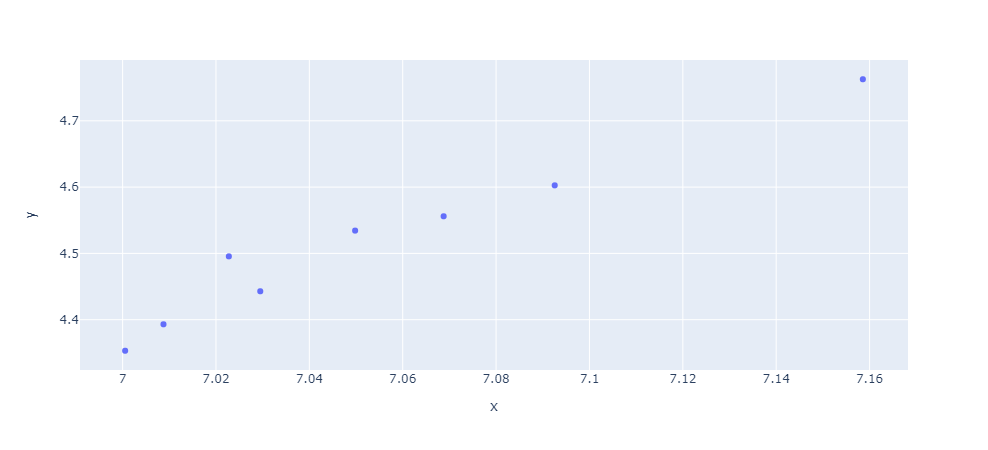

In [52]:
plot_df = CPA_L6[["Code","Descr", "Descr_cleaned_vectorized_low_dimension", "label"]].copy()

plot_df["x"] = plot_df.Descr_cleaned_vectorized_low_dimension.apply(lambda x: x[0])
plot_df["y"] = plot_df.Descr_cleaned_vectorized_low_dimension.apply(lambda x: x[1])

plot_df["label"] = plot_df.label.astype(str)
test_case = plot_df[plot_df.Code =='46.63.10']

plot_df = plot_df[plot_df["label"] == test_case.label.values[0]]

fig = plotly.express.scatter(
    plot_df, 
    x="x", 
    y="y", 
    color="label",
    hover_data={
        "Code": True,
        "Descr":True,
        "Descr_cleaned_vectorized_low_dimension": False,
        "label": False,
        "x": False,
        "y": False
        })
fig.update_layout(showlegend=False)

In [ ]:
test

In [17]:
# Why is Despicable Me 2 next to Spy films?
print(movies_df[movies_df.title == "Despicable Me 2"].overview.tolist())

['Gru is recruited by the Anti-Villain League to help deal with a powerful new super criminal.']


In [18]:
# Villain? Criminal? 

# He's called Gru, GRU...

In [19]:
wv.most_similar("gru")

[('kgb', 0.6759157776832581),
 ('smersh', 0.5931000709533691),
 ('spetsnaz', 0.5695321559906006),
 ('nkgb', 0.5644126534461975),
 ('counterintelligence', 0.5616932511329651),
 ('rezident', 0.5581782460212708),
 ('nkvd', 0.5543013215065002),
 ('nkvd/nkgb', 0.5516831278800964),
 ('gugb', 0.5502406358718872),
 ('krechetnikov', 0.5455362796783447)]